In [1]:
import pandas as pd
import numpy as np

In [2]:
file=r'/Users/lalitsachan/Dropbox/PDS V3/Data/bank-full.csv'

In [3]:
bd=pd.read_csv(file,delimiter=';')


In [5]:
bd.shape

(45211, 17)

In [6]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bd.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bd.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
bd['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [9]:
bd['age'].mean(),bd['age'].median()

(40.93621021432837, 39.0)

|Function	|Description|
|-----------|-----------|
|count	|Number of non-null observations|
|sum	|Sum of values|
|mean	|Mean of values|
|mad	|Mean absolute deviation|
|median	|Arithmetic median of values|
|min	|Minimum|
|max	|Maximum|
|mode	|Mode|
|abs	|Absolute Value|
|prod	|Product of values|
|std	|Unbiased standard deviation|
|var	|Unbiased variance|
|sem	|Unbiased standard error of the mean|
|skew	|Unbiased skewness (3rd moment)|
|kurt	|Unbiased kurtosis (4th moment)|
|quantile	|Sample quantile (value at %)|
|cumsum	|Cumulative sum|
|cumprod	|Cumulative product|
|cummax	|Cumulative maximum|
|cummin	|Cumulative minimum|

In [10]:
bd['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
k=bd['job'].value_counts()

In [13]:
k.index[-1]

'unknown'

In [14]:
pd.crosstab(bd['default'],bd['housing'])

housing,no,yes
default,,
no,19701,24695
yes,380,435


In [15]:
pd.crosstab(bd['default'],bd['housing'],margins=True)

housing,no,yes,All
default,,,
no,19701,24695,44396
yes,380,435,815
All,20081,25130,45211


In [ ]:
# kaushik : how to convert these to percentages ( row , column)
# roopali : pd.pivot_table

In [17]:
bd.select_dtypes(exclude=['object'])

In [18]:
cat_var=bd.select_dtypes(['object']).columns

In [19]:
for col in cat_var:
    print(bd[col].value_counts())
    print('~~~~~')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
~~~~~
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
~~~~~
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
~~~~~
no     44396
yes      815
Name: default, dtype: int64
~~~~~
yes    25130
no     20081
Name: housing, dtype: int64
~~~~~
no     37967
yes     7244
Name: loan, dtype: int64
~~~~~
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
~~~~~
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
~~~~~
unknown    36959
failure     4901
other       1840

In [22]:
bd.groupby(['housing','loan']).mean()
# srikant : how to bring index to data frame as columns

age      balance        day    duration  campaign  \
housing loan                                                            
no      no    43.260695  1737.606719  16.062427  257.923971  2.823123   
        yes   42.417449   752.713243  16.093848  249.387209  2.980188   
yes     no    39.142947  1256.407793  15.518711  260.914271  2.690026   
        yes   39.329059   788.537898  15.976414  251.806045  2.738722   

                  pdays  previous  
housing loan                       
no      no    27.870495  0.510986  
        yes   16.828989  0.328120  
yes     no    52.231855  0.658094  
        yes   46.941379  0.649874

In [23]:
bd.groupby(['housing','default'])['balance','day'].mean()

balance        day
housing default                        
no      no       1628.695295  16.043247
        yes       -72.589474  17.294737
yes     no       1199.227374  15.598380
        yes      -194.436782  15.590805

In [24]:
bd.aggregate({'housing':'count','balance':'mean','age':'nunique'})

housing    45211.000000
balance     1362.272058
age           77.000000
dtype: float64

# Visual Summary with seaborn

In [25]:
import seaborn as sns
%matplotlib inline
# you can exaplore : ggplot

## Single Numeric Column

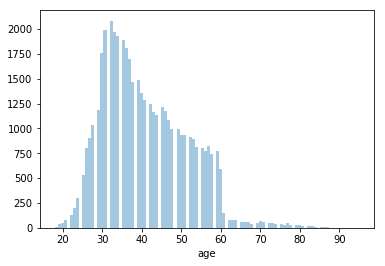

In [30]:
sns.distplot(bd['age'],kde=False,norm_hist=False,bins=100,hist=True)



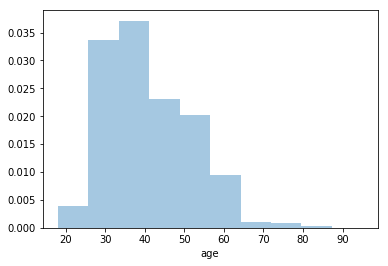

In [32]:
myplot=sns.distplot(bd['age'],kde=False,norm_hist=True,bins=10,hist=True)
myimg=myplot.get_figure()

In [33]:
myimg.savefig('output.png')

In [31]:
import os
# import sys
os.getcwd()

'/Users/lalitsachan/Dropbox/PDS V3/2.Data_Prep'

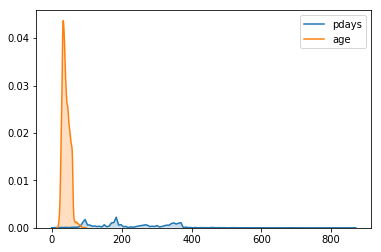

In [36]:
sns.kdeplot(bd['pdays'],shade=True)

sns.kdeplot(bd['age'],shade=True)

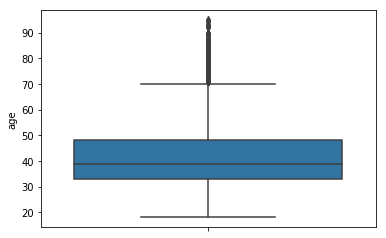

In [37]:
sns.boxplot(y='age',data=bd)

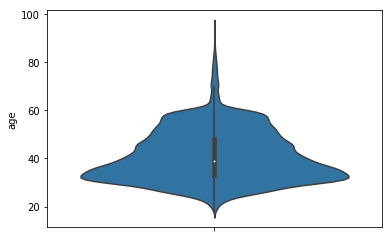

In [38]:
sns.violinplot(y='age',data=bd)

## numeric-numeric

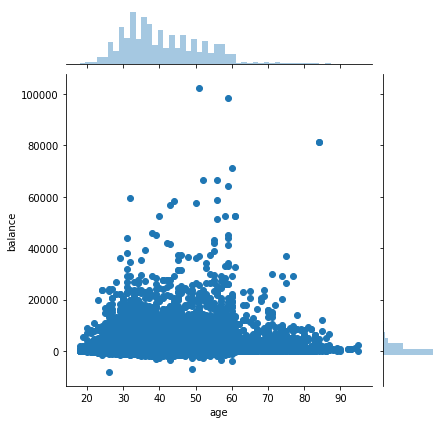

In [39]:
sns.jointplot(x="age", y="balance", data=bd)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


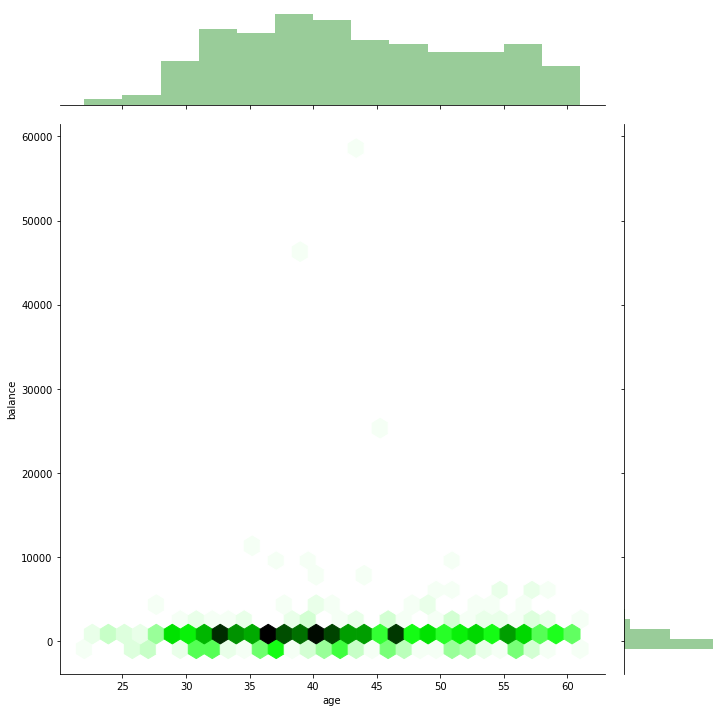

In [41]:
sns.jointplot(x="age", y="balance", data=bd.iloc[:1000,:],
              kind="hex",size=10,color="g")
# used subset of data to see a more clear plot
# manoj : what other inputs for kind 

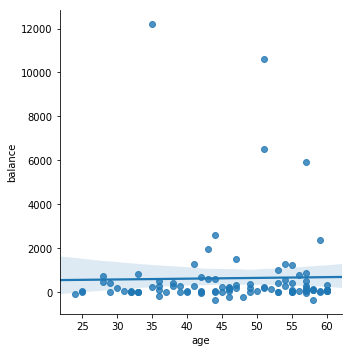

In [44]:
sns.lmplot('age', 'balance', 
           data=bd.iloc[1:100,:],palette="Set1",
           fit_reg=True,order=1)
# find out what other values of palette

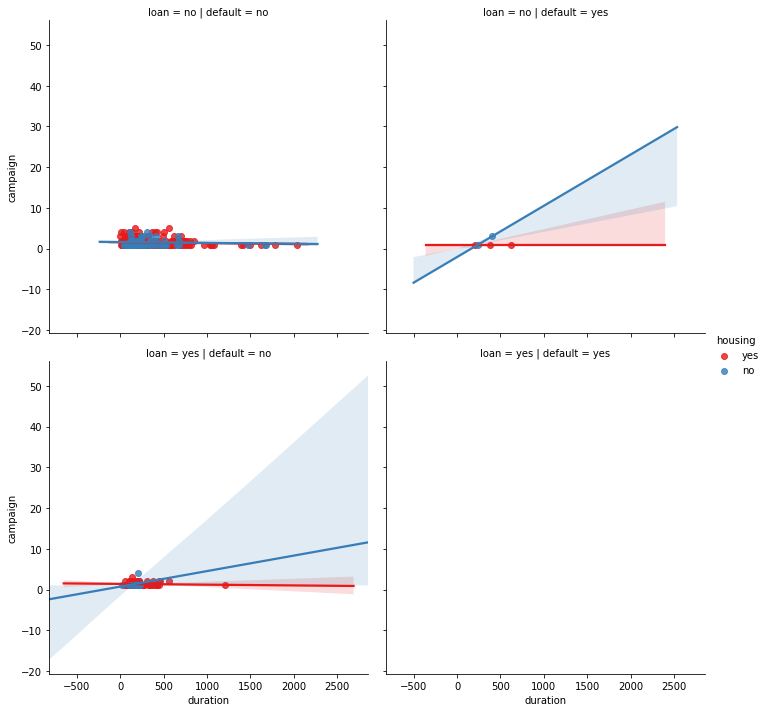

In [45]:
sns.lmplot('duration', 'campaign', 
           data=bd.iloc[1:500,:],palette="Set1",
           hue='housing',
           col='default',
           row='loan',
           fit_reg=True)

## Categorical

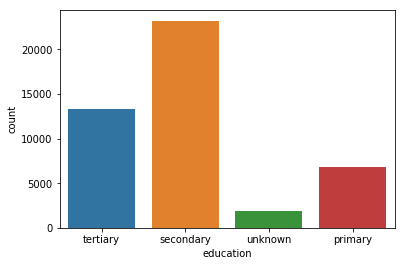

In [46]:
sns.countplot(x="education", data=bd)

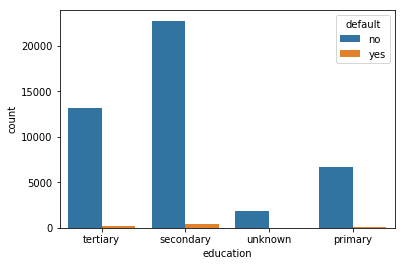

In [47]:
sns.countplot(x="education", data=bd,hue='default')

# kamesh : sns.barplots functional examples

# Numeric Categorical 

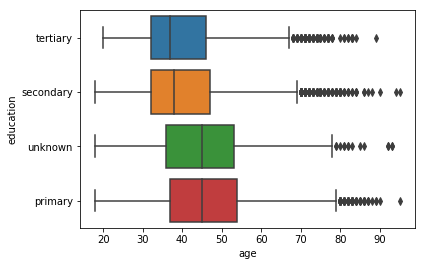

In [48]:
sns.boxplot(x='age',y='education',data=bd)

# Heatmaps

In [49]:
bd.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


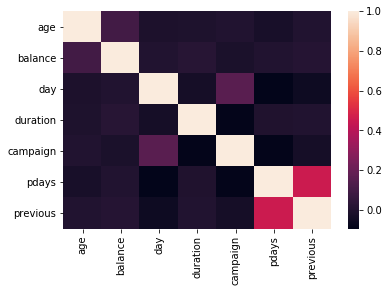

In [50]:
sns.heatmap(bd.corr())

In [ ]:
# plotly 
# bokeh 
# D3.js 